In [58]:
import pandas as pd

In [59]:
results = pd.read_csv("query19_o4_sizes.csv")
results

,Part,Type,Cardinality,Columns
0,A,Before,200000,5
1,A,After,200000,5
2,B,Before,529392,8
3,B,After,529392,6
4,C,Before,269118,12
5,C,After,269118,4


In [60]:
string_characters = 10
# Bytes - jonskeet.uk
string_size = string_characters * 2 + 26

results['Size'] = results.apply(lambda x : x["Cardinality"] * x["Columns"] * string_size, axis=1)
results['Size'] = results['Size'].apply(lambda x : x / 1000000)
results

,Part,Type,Cardinality,Columns,Size
0,A,Before,200000,5,46.000000
1,A,After,200000,5,46.000000
2,B,Before,529392,8,194.816256
3,B,After,529392,6,146.112192
4,C,Before,269118,12,148.553136
5,C,After,269118,4,49.517712


In [66]:
print(f"Part B reduction: {((194.816256 - 146.112192) / 194.816256) * 100}")
print(f"Part C reduction: {((148.553136 - 49.517712) / 148.553136) * 100}")

Part B reduction: 25.000000000000007
Part C reduction: 66.66666666666666


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle
import os

In [64]:
filename = f"../analysis_results/y2_report/o4_intermediate_result_sizes.png"

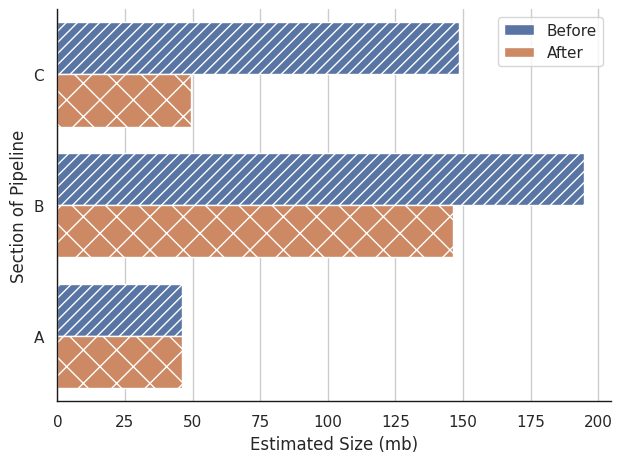

In [65]:
sns.set(style="whitegrid", color_codes=True)

barplot_order = sorted(list(set(results["Part"].to_list())), reverse=True)

bar = sns.barplot(results, x="Size", y="Part", hue="Type", legend=True, order=barplot_order)

chosen_hatches = cycle(["///", "x"])

num_locations = len(results.Part.unique())
assert chosen_hatches.__sizeof__() >= num_locations


bar.set_ylabel("Section of Pipeline")
bar.set_xlabel("Estimated Size (mb)")
bar.legend(title="")

for i, thisbar in enumerate(bar.patches):
    if i % num_locations == 0:
        hatch = next(chosen_hatches)
    thisbar.set_hatch(hatch)
    
# Make axes weightier
plt.setp(bar.spines.values(), linewidth=1)

for spine in bar.spines.values():
    spine.set_edgecolor('k')
    
bar.spines[['right', 'top']].set_visible(False)

plt.tight_layout()

if filename != None:
    os.makedirs(os.path.dirname(filename), exist_ok=True)  
    plt.savefig(filename, bbox_inches="tight", transparent=True)
        

plt.show()